In [1]:

import warnings
from math import sqrt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv("data/data_deals_done.csv")
    print(df.columns)
    print(df.shape)
except Exception:
    print("Seems we have a problem")

Index(['_id', 'sale_day', 'address', 'property_type', 'rooms_number', 'floor',
       'build_year', 'building_mr', 'city', 'sale_day_year', 'sale_day_month',
       'street_name', 'street_number', 'final_price'],
      dtype='object')
(319055, 14)


In [3]:
used_features = [
    'sale_day_month', 
    'street_name', 
    'street_number', 
    'property_type', 
    'rooms_number', 
    'floor',
    'build_year', 
    'building_mr',
    'city'
]


In [4]:
X = df[used_features]
y = df['final_price']


תל אביב יפו
(24242, 14)


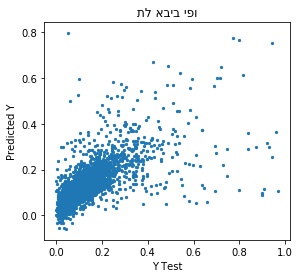

Mean squared error: 0.00
Mean squared error sqrt: 0.05872070103297068
Variance score: 0.52
חיפה
(22781, 14)


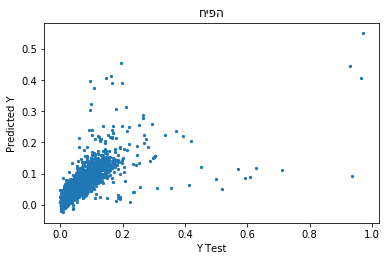

Mean squared error: 0.00
Mean squared error sqrt: 0.0304142563612516
Variance score: 0.56
באר שבע
(21686, 14)


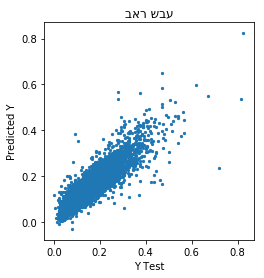

Mean squared error: 0.00
Mean squared error sqrt: 0.0387365038569631
Variance score: 0.79
ירושלים
(21634, 14)


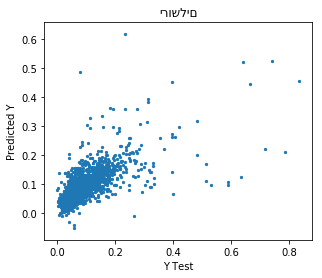

Mean squared error: 0.00
Mean squared error sqrt: 0.03155150461533186
Variance score: 0.56
פתח תקווה
(14333, 14)


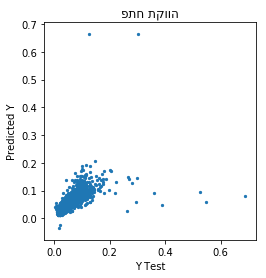

Mean squared error: 0.00
Mean squared error sqrt: 0.023411721795943922
Variance score: 0.38
אשדוד
(13601, 14)


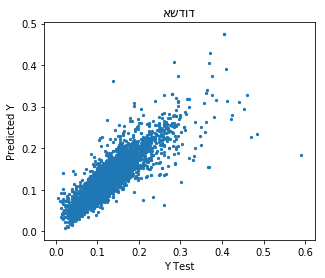

Mean squared error: 0.00
Mean squared error sqrt: 0.029012314297796295
Variance score: 0.75
אשקלון
(13424, 14)


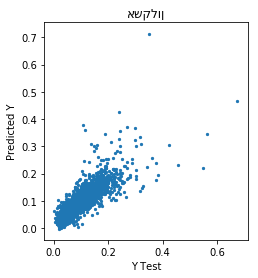

Mean squared error: 0.00
Mean squared error sqrt: 0.028268559185787336
Variance score: 0.68
נתניה
(12948, 14)


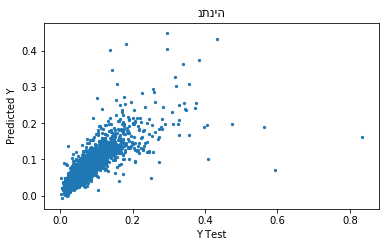

Mean squared error: 0.00
Mean squared error sqrt: 0.029081793954657025
Variance score: 0.63
ראשון לציון
(12212, 14)


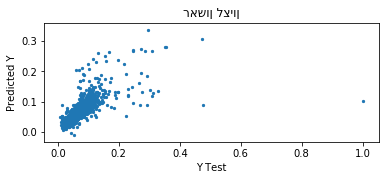

Mean squared error: 0.00
Mean squared error sqrt: 0.023913707722310017
Variance score: 0.54
חולון
(9946, 14)


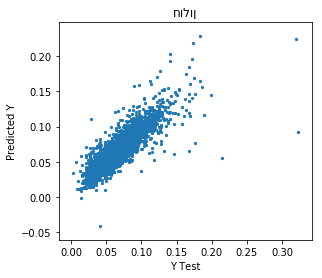

Mean squared error: 0.00
Mean squared error sqrt: 0.014621647083290388
Variance score: 0.73
רמת גן
(9103, 14)


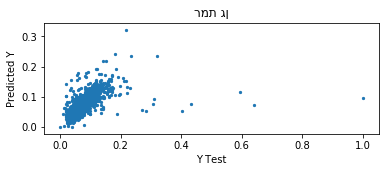

Mean squared error: 0.00
Mean squared error sqrt: 0.03170464156641354
Variance score: 0.33
בת ים
(8467, 14)


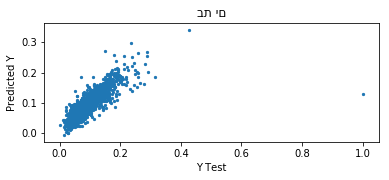

Mean squared error: 0.00
Mean squared error sqrt: 0.02576067829859707
Variance score: 0.68
רחובות
(7558, 14)


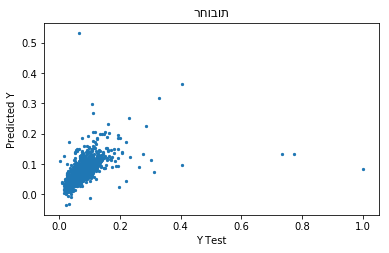

Mean squared error: 0.00
Mean squared error sqrt: 0.03701319534694262
Variance score: 0.23
חדרה
(6470, 14)


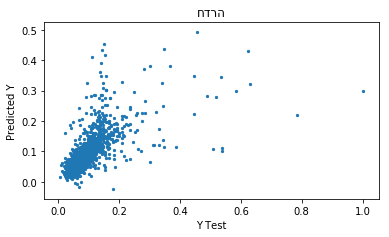

Mean squared error: 0.00
Mean squared error sqrt: 0.04923966025862155
Variance score: 0.35
נהריה
(5414, 14)


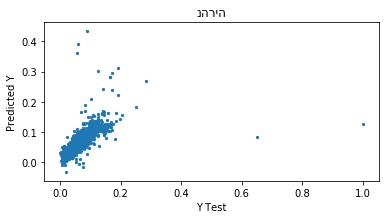

Mean squared error: 0.00
Mean squared error sqrt: 0.03497946927658839
Variance score: 0.33
אילת
(5347, 14)


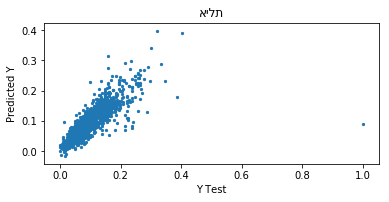

Mean squared error: 0.00
Mean squared error sqrt: 0.03546057957728157
Variance score: 0.64
קרית אתא
(4607, 14)


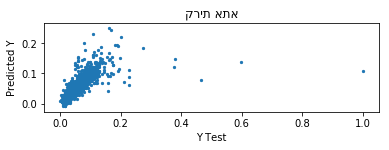

Mean squared error: 0.00
Mean squared error sqrt: 0.03651418144381798
Variance score: 0.45
עפולה
(4213, 14)


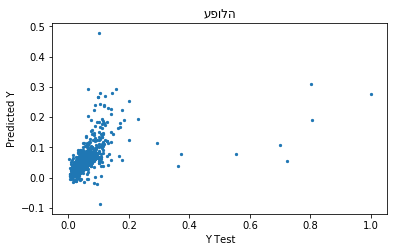

Mean squared error: 0.00
Mean squared error sqrt: 0.052369880386328546
Variance score: 0.20
בני ברק
(3430, 14)


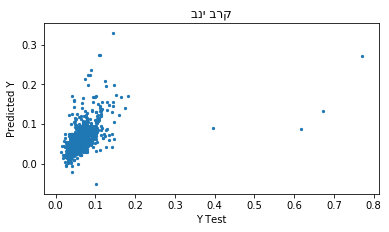

Mean squared error: 0.00
Mean squared error sqrt: 0.039929841455637466
Variance score: 0.12
לוד
(3258, 14)


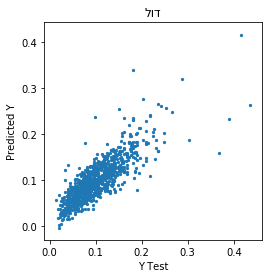

Mean squared error: 0.00
Mean squared error sqrt: 0.02796328710827333
Variance score: 0.69


In [9]:
cities = df.groupby(['city']).city.value_counts().nlargest(20)

for city in cities.keys():
    print(city[0])
    _df = df.loc[(df['city'] == city[0])]
    print(_df.shape)
    X = _df[used_features]
    y = _df['final_price']
    
    min_max_scalar = preprocessing.MinMaxScaler()
    y = min_max_scalar.fit_transform(np.array(y).reshape(-1, 1))
    y = pd.DataFrame(y)

    ohe = preprocessing.OneHotEncoder()
    X = ohe.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    lm = LinearRegression()
    
    lm.fit(X_train, y_train)

    predictions = lm.predict(X_test)
    plt.scatter(y_test, predictions, s=5)
    plt.title(city[0])
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y_test, predictions))
    print("Mean squared error sqrt:", sqrt(mean_squared_error(y_test, predictions)))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, predictions))

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

cities = df.groupby(['city']).city.value_counts().nlargest(4)

for city in cities.keys():
    print(city[0])
    _df = df.loc[(df['city'] == city[0])]
    print(_df.shape)
    X = _df[used_features]
    y = _df['final_price']
    y, info = pd.qcut(np.array(y), 10, retbins=True)
    print(info)
    y = pd.DataFrame(y.codes)
    
    ohe = preprocessing.OneHotEncoder()
    X = ohe.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

    rfc = RandomForestClassifier(n_estimators=150)
    rfc.fit(X_train,y_train)

    predictions = rfc.predict(X_test)
    print(classification_report(y_test,predictions))
    print(confusion_matrix(y_test,predictions))


תל אביב יפו
(24242, 14)
[  100800.   1025000.   1350000.   1640000.   1906984.   2221169.5
  2550000.   2900000.   3435000.   4425922.2 24999999. ]
              precision    recall  f1-score   support

           0       0.44      0.61      0.51       703
           1       0.39      0.38      0.38       757
           2       0.32      0.26      0.28       704
           3       0.34      0.32      0.33       733
           4       0.32      0.31      0.31       698
           5       0.32      0.29      0.30       759
           6       0.29      0.25      0.27       725
           7       0.33      0.29      0.31       726
           8       0.34      0.40      0.37       739
           9       0.60      0.69      0.64       729

   micro avg       0.38      0.38      0.38      7273
   macro avg       0.37      0.38      0.37      7273
weighted avg       0.37      0.38      0.37      7273

[[431 125  40  37  21   8  11  10  17   3]
 [213 286 105  43  28  22  18  17  18   7]
 [131 1